# Business Question 
### Customer behaviour analysis
- Why customers stop using a product or service?
- What percentage of customers have churned in the past quarter?
- Predict/recommend the next order of a customer?

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
products = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/products.csv")
order_products_train = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/order_products__train.csv")
order_products_prior = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/order_products__prior.csv") 
departments = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/departments.csv")
aisles = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/aisles.csv")
orders = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/orders.csv")

In [54]:
order_products_train.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [5]:
order_products_prior.shape

(32434489, 4)

In [ ]:
orders.shape

In [58]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [60]:
departments.columns

Index(['department_id', 'department'], dtype='object')

In [62]:
aisles.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [64]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [70]:
import pandas as pd

# Load the data
orders = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/orders.csv")

# Convert 'days_since_prior_order' column to numeric (if needed)
orders['days_since_prior_order'] = pd.to_numeric(orders['days_since_prior_order'], errors='coerce')

# 1. Calculate the number of inactive customers in the last 30 days
# Inactive customers are those who haven't ordered in the last 30 days
inactive_customers = (
    orders.groupby('user_id')['days_since_prior_order']
    .max()
    .reset_index()
    .rename(columns={'days_since_prior_order': 'max_days_since_prior'})
)

# Filter for customers with a max days_since_prior_order >= 30 (inactive) or no prior order (NaN)
inactive_customers_30_days = inactive_customers[
    (inactive_customers['max_days_since_prior'] >= 30) | (inactive_customers['max_days_since_prior'].isna())
]

inactive_customers_30_days_count = inactive_customers_30_days['user_id'].nunique()
print(f"Number of inactive customers in the last 30 days: {inactive_customers_30_days_count}")

# 2. Calculate churn rate based on inactive customers in the last 30 days
total_customers = orders['user_id'].nunique()
print(f"Total number of unique customers: {total_customers}")
 
# Calculate churn rate
churn_rate = (inactive_customers_30_days_count / total_customers) * 100
print(f"Churn rate: {churn_rate:.2f}%")


Number of inactive customers in the last 30 days: 152012
Total number of unique customers: 206209
Churn rate: 73.72%


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the data from CSV files
products = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/products.csv")
order_products_train = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/order_products__train.csv")
order_products_prior = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/order_products__prior.csv") 
orders = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/orders.csv")

# Step 2: Merge the 'orders' table with 'order_products_train' and 'order_products_prior' tables
train_data = pd.merge(order_products_train, orders, on='order_id', how='left')
prior_data = pd.merge(order_products_prior, orders, on='order_id', how='left')

# Step 3: Merge both prior and train data into one dataset
merged_data = pd.concat([train_data, prior_data], ignore_index=True)

# Step 4: Merge with products to get product details
merged_data = pd.merge(merged_data, products, on='product_id', how='left')

# Step 5: Create the churn variable (1 for churned, 0 for not churned)
# Churn is defined here as users who haven't ordered in the last 30 days
merged_data['churn'] = merged_data['days_since_prior_order'].apply(lambda x: 0 if x <= 30 else 1)


In [78]:
# Step 6: Select the features (this can be customized based on your analysis)
# Feature columns are chosen based on available data
X = merged_data[['user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
y = merged_data['churn']  # Target variable: churn



In [80]:
# Step 7: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 10: Evaluate the model using accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Optional: You can also predict the churn for future data or specific users
future_predictions = model.predict(X_test)  # Change this to future data if needed
print(f"Future churn predictions: {future_predictions}")


In [8]:
orders = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/orders.csv")
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [1]:
import pandas as pd
#Remove non-ASCII characters

file_path = '/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/products.csv'
df = pd.read_csv(file_path, encoding='utf-8')

def remove_non_ascii(text):
    # If value is not string (e.g., NaN), return it as is
    if not isinstance(text, str):
        return text
    return ''.join([char for char in text if ord(char) < 128])

df_cleaned = df.applymap(remove_non_ascii)
cleaned_file_path = '/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/products1.csv'
df_cleaned.to_csv(cleaned_file_path, encoding='utf-8', index=False)

print("Non-ASCII characters removed and saved to new file.")

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_32383/2541108991.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(remove_non_ascii)


Non-ASCII characters removed and saved to new file.


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_85416/3362088738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='eval_set', data=orders, palette=colors)
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_85416/3362088738.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='eval_set', data=orders, palette=colors)


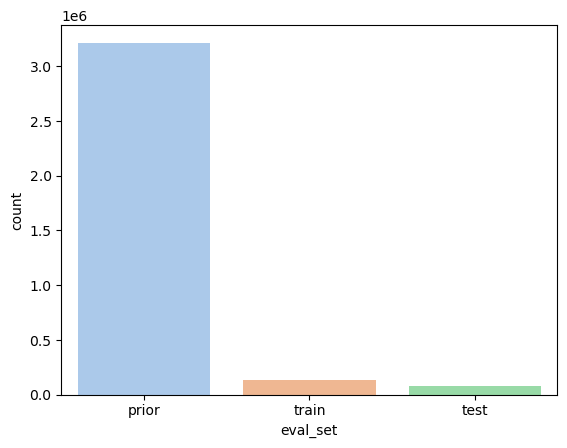

In [81]:
colors = sns.color_palette("pastel")
sns.countplot(x='eval_set', data=orders, palette=colors)
plt.show()

## Reordered Ratio of Products in Prior Set

reordered
1    0.589697
0    0.410303
Name: count, dtype: float64


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_85416/4213713836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reorder_ratio_prior.index, y=reorder_ratio_prior.values, palette=colors)
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_85416/4213713836.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['First-time ordered products', 'Reordered'])


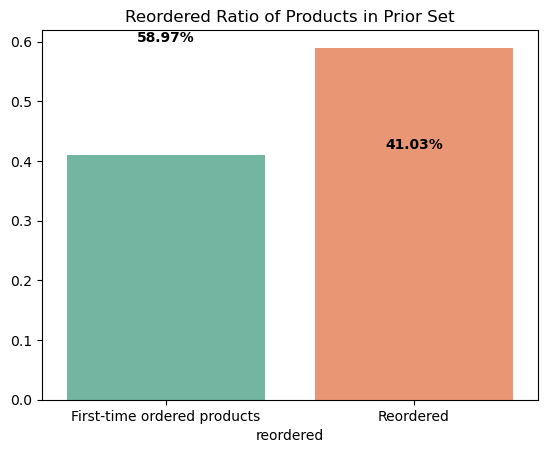

In [68]:
total_prod_count_prior = order_products_prior.shape[0]
reorder_ratio_prior = order_products_prior['reordered'].value_counts()/total_prod_count_prior
print(reorder_ratio_prior)

colors = ['#66c2a5', '#fc8d62']  # You can use any colors you like

# Plot the barplot
ax = sns.barplot(x=reorder_ratio_prior.index, y=reorder_ratio_prior.values, palette=colors)
ax.set_xticklabels(['First-time ordered products', 'Reordered'])

# Annotate each bar with the percentage
for i, value in enumerate(reorder_ratio_prior.values):
    ax.text(i, value + 0.01, f"{value:.2%}", ha='center', color='black', fontweight='bold')

# Set the plot title
plt.title('Reordered Ratio of Products in Prior Set')

# Show the plot
plt.show()


## Reordered Ratio of Products in Train Set

reordered
1    0.598594
0    0.401406
Name: count, dtype: float64


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_85416/1235754156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reorder_ratio_train.index, y=reorder_ratio_train.values, palette=colors)
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_85416/1235754156.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['First-time ordered products', 'Reordered'])


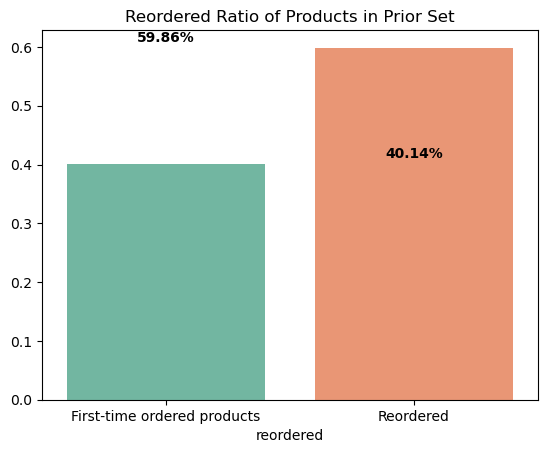

In [70]:
total_prod_count_train = order_products_train.shape[0]
reorder_ratio_train = order_products_train['reordered'].value_counts()/total_prod_count_train
print(reorder_ratio_train)

colors = ['#66c2a5', '#fc8d62']  # You can use any colors you like

# Plot the barplot
ax = sns.barplot(x=reorder_ratio_train.index, y=reorder_ratio_train.values, palette=colors)
ax.set_xticklabels(['First-time ordered products', 'Reordered'])

# Annotate each bar with the percentage
for i, value in enumerate(reorder_ratio_train.values):
    ax.text(i, value + 0.01, f"{value:.2%}", ha='center', color='black', fontweight='bold')

# Set the plot title
plt.title('Reordered Ratio of Products in Prior Set')

# Show the plot
plt.show()


In [34]:
import pandas as pd

# Load the dataset
orders = pd.read_csv('/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/orders.csv')

# Convert 'days_since_prior_order' to numeric (if needed)
orders['days_since_prior_order'] = pd.to_numeric(orders['days_since_prior_order'], errors='coerce')

# Create 'order_date' column using 'order_number' and 'days_since_prior_order'
orders['order_date'] = pd.to_datetime(orders['order_number'], unit='D')

# Extract year and month
orders['year_month'] = orders['order_date'].dt.to_period('M')

# Calculate the last order date for each customer
last_order = orders.groupby('user_id')['order_date'].max().reset_index()

# Define the churn threshold (e.g., 30 days)
churn_threshold = pd.Timedelta(days=30)

# Create a 'churned' column indicating whether the customer churned
last_order['churned'] = last_order['order_date'] < (last_order['order_date'].max() - churn_threshold)

# Merge the churn status back with the original dataset
orders = pd.merge(orders, last_order[['user_id', 'churned']], on='user_id', how='left')

# Group by year_month and calculate churn rate for each month
monthly_churn = orders.groupby('year_month')['churned'].mean().reset_index()

# Convert churn rate to percentage
monthly_churn['churn_rate'] = monthly_churn['churned'] * 100

# Convert 'year_month' to string to modify the year part
monthly_churn['year_month'] = monthly_churn['year_month'].astype(str)

# Replace the year '1970' with '2021'
monthly_churn['year_month'] = monthly_churn['year_month'].replace(r'^1970', '2021', regex=True)

# Display the modified churn rates with year as 2021
print(monthly_churn[['year_month', 'churn_rate']])


  year_month  churn_rate
0    2021-01   95.311394
1    2021-02   72.755415
2    2021-03   12.109030
3    2021-04    0.000000


In [6]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection details
username = 'root'
password = 'berlin13055'
host = '127.0.0.1'  # Localhost for MySQL
database = 'instacart'

# SQLconnection 
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}/{database}'
engine = create_engine(connection_string)

# File path for the CSV
csv_file_path = "/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/order_products__prior.csv"

# Define the starting row and limit to 10 million rows
starting_row = 24081611 
rows_to_insert = 1000000 

# Column names as per the database schema 
column_names = ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

try:
    # Read the CSV, starting from the row after the existing data, with only 1 million rows
    df = pd.read_csv(csv_file_path, skiprows=starting_row, nrows=rows_to_insert, header=None, names=column_names)
    
    df.to_sql(name='order_products_prior', con=engine, if_exists='append', index=False)
    
    print("Inserted 1 million rows.")

except Exception as e:
    print(f"Error occurred: {e}")

finally:
    engine.dispose()


Inserted 1 million rows.


In [51]:
import pandas as pd

# Load the orders table into a DataFrame
orders = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/orders.csv")  # or use your MySQL connection if already loaded in SQL

duplicate_order_ids = orders[orders.duplicated(subset=['order_id'], keep=False)]

# Show the duplicate order ids
print(duplicate_order_ids)


Empty DataFrame
Columns: [order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [103]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection details
username = 'root'
password = 'berlin13055'
host = '127.0.0.1'  # Localhost for MySQL
database = 'instacart'

# SQL connection string
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}/{database}'
engine = create_engine(connection_string)

# File path for the CSV
csv_file_path = "/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/orders.csv"

# Define the starting row and limit to 2 million rows
starting_row = 3421084
rows_to_insert = 100

# Column names as per the database schema
column_names = ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

try:
    # Read the CSV, starting from the row after the existing data, with only 2 million rows
    df = pd.read_csv(csv_file_path, skiprows=starting_row, nrows=rows_to_insert, header=None, names=column_names)

    # Insert the DataFrame into the SQL table 'orders'
    df.to_sql(name='orders', con=engine, if_exists='append', index=False)

    print("Inserted 2 million rows.")

except Exception as e:
    print(f"Error occurred: {e}")

finally:
    # Dispose of the engine (this closes the connection to MySQL)
    engine.dispose()


Inserted 2 million rows.


In [28]:
import pandas as pd

# Original file path
csv_file_path = "/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/orders.csv"

# Output file path for the new CSV with rows after the first 799,508
output_file_path = "/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/orders_after_799508.csv"

# Number of rows to skip
rows_to_skip = 799508

# Load the data after skipping the first 799,508 rows
df = pd.read_csv(csv_file_path, skiprows=rows_to_skip, header=0)  # 'header=0' to retain column headers

# Save the remaining data to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path} after dropping the first {rows_to_skip} rows.")


Data saved to /Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-market-basket-analysis/datafiles/orders_after_799508.csv after dropping the first 799508 rows.
